In [4]:
# coding=utf-8
import csv
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense, Embedding,LSTM,GRU
import pandas as pd
import jieba 
import logging
from hanziconv import HanziConv
from gensim.models import Word2Vec  
from gensim.models.word2vec import LineSentence
import matplotlib.pyplot as plt
%matplotlib inline
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
#add dictionary
jieba.add_word('不')
jieba.add_word('喜歡')
jieba.add_word('現在')
jieba.add_word('在乎')
jieba.add_word('瘋瞭')
jieba.add_word('永遠')
jieba.add_word('無法')
jieba.add_word('這堂課')
jieba.add_word('會')
jieba.add_word('齣糗')
jieba.add_word('退迴來')
jieba.add_word('覺得')
jieba.add_word('閤作')
jieba.add_word('應該')
jieba.add_word('這件事')
jieba.add_word('外麵')
jieba.add_word('麵對')
jieba.add_word('太')
jieba.add_word('對勁')
jieba.add_word('控製')
jieba.add_word('麵前')
jieba.add_word('禮拜')
jieba.add_word('睏擾')
jieba.add_word('我')
jieba.add_word('想')
jieba.add_word('總是')
jieba.add_word('都會')
jieba.add_word('大傢')
jieba.add_word('過得')
jieba.add_word('大傢')
jieba.add_word('背後')
jieba.add_word('纔會')
jieba.add_word('沒有')
jieba.add_word('猜到')
jieba.add_word('毀瞭')
jieba.add_word('受傷')
jieba.add_word('絕對')
jieba.add_word('長得')
jieba.add_word('處的來')
jieba.add_word('也許')
jieba.add_word('每')
jieba.add_word('愛')

In [5]:
filePath1='train_test.txt'
fileSegWordDonePath1 ='corpusSegDone1.txt'
filePath2='test.txt'
fileSegWordDonePath2 ='corpusSegDone2.txt'
filePath='trainandtest.txt'
fileSegWordDonePath ='corpusSegDone.txt'

# read the file by file
fileTrainRead = []
with open(filePath) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))
# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][:],cut_all=False)))])
    with open(fileSegWordDonePath,'wb') as fW:
        for j in range(len(fileTrainSeg)):
            fW.write(fileTrainSeg[j][0].encode('utf-8'))


fileTrainRead = []
with open(filePath1) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][:],cut_all=False)))])
    with open(fileSegWordDonePath1,'wb') as fW:
        for j in range(len(fileTrainSeg)):
            fW.write(fileTrainSeg[j][0].encode('utf-8'))

fileTrainRead = []
with open(filePath2) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][:],cut_all=False)))])
    with open(fileSegWordDonePath2,'wb') as fW:
        for j in range(len(fileTrainSeg)):
            fW.write(fileTrainSeg[j][0].encode('utf-8'))


In [6]:
inp1 = '1.txt'
fileSegWordDonePath1 ='2.txt'
fileSegWordDonePath2 ='3.txt'
kmodel = Word2Vec(LineSentence(inp1), size=2 , min_count=1)
print(kmodel)
word2idx = {"_PAD": 0} # 初始化 `[word : token]` 字典，后期 tokenize 语料库就是用该词典。
vocab_list = [(k, kmodel.wv[k]) for k, v in kmodel.wv.vocab.items()]
#存储所有 word2vec 中所有向量的数组，留意其中多一位，词向量全为 0， 用于 padding
embeddings_matrix = np.zeros((len(kmodel.wv.vocab.items()) + 1, kmodel.vector_size))
for i in range(len(vocab_list)):
    word = vocab_list[i][0]
    word2idx[word] = i + 1
    embeddings_matrix[i + 1] = vocab_list[i][1]
print(embeddings_matrix[0])
print(embeddings_matrix[1][0])
    
df = pd.read_csv('output.csv',header=None)
y_train = df.as_matrix()
#print (a.shape)
#print(X_train)
df = pd.read_csv('output_test.csv',header=None)
y_test = df.as_matrix()

Word2Vec(vocab=286, size=2, alpha=0.025)
[0. 0.]
0.211379274725914


c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [7]:
#print(embeddings_matrix[1])

print(kmodel[u'他'])
print(kmodel[u'一定'])
print(kmodel[u'不'])
print(kmodel[u'信任'])
print(kmodel[u'我'])

[-0.16052105 -0.19393131]
[0.00203534 0.15631916]
[0.04581968 0.11442892]
[-0.13503312 -0.04192081]
[ 0.05054644 -0.15995528]


c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__(

In [8]:
data_array = []
with open(fileSegWordDonePath1,'rb') as fs:
    row = fs.read().decode('utf-8').split(' ')
    temp = []
    count = 0
    for i in range(len(row)):
        if '\n' not in row[i]:
            for j in range(len(embeddings_matrix)):
                if embeddings_matrix[j][0] == kmodel[row[i]][0]:
                    temp.append(j)
            count += 1
        else:
            if count<15:
                num = 15 - count
                for j in range(num):
                    zero = 0
                    temp.append(zero)
            temp[0] = np.squeeze(temp[0])
            data_array.append(temp)
            word = row[i].split()
            temp = []
            for j in range(len(embeddings_matrix)):
                if embeddings_matrix[j][0] == kmodel[word][0][0]:
                    temp.append(j)
            count = 1
    if count<15:
        num = 15 - count
        for j in range(num):
            zero = 0
            temp.append(zero)
    data_array.append(temp)
data_array = np.array(data_array).reshape((153, 15))
data_array[152][0] = np.squeeze(data_array[152][0])
X_train=data_array[:,:]
print (X_train)

data_array = []
with open(fileSegWordDonePath2,'rb') as fs:
    row = fs.read().decode('utf-8').split(' ')
    temp = []
    count = 0
    for i in range(len(row)):
        if '\n' not in row[i]:
            for j in range(len(embeddings_matrix)):
                if embeddings_matrix[j][0] == kmodel[row[i]][0]:
                    temp.append(j)
            count += 1
        else:
            if count<15:
                num = 15 - count
                for j in range(num):
                    zero = 0
                    temp.append(zero)
            temp[0] = np.squeeze(temp[0])
            data_array.append(temp)
            word = row[i].split()
            temp = []
            for j in range(len(embeddings_matrix)):
                if embeddings_matrix[j][0] == kmodel[word][0][0]:
                    temp.append(j)
            count = 1
    if count<15:
        num = 15 - count
        for j in range(num):
            zero = 0
            temp.append(zero)
    data_array.append(temp)

data_array = np.array(data_array).reshape((28, 15))
data_array[27][0] = np.squeeze(data_array[27][0])
X_test=data_array[:,:]


c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


[[162  73 159 ...   0   0   0]
 [ 54 277  15 ...   0   0   0]
 [228 157  73 ...   0   0   0]
 ...
 [ 18 193 169 ...   0   0   0]
 [238  12 286 ...   0   0   0]
 [187  82  18 ...   0   0   0]]


c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
c:\users\wayway\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Epoch 1/1
153/153 [==============================] - 1s 5ms/step - loss: 1.7908 - acc: 0.1961
iteration: 25 loss: 1.7610258767807405  accuracy: 0.2549019678940181
test accuracy: 0.2857142857142857
iteration: 50 loss: 1.660133084440543  accuracy: 0.32679738640006073
test accuracy: 0.35714285714285715
iteration: 75 loss: 1.4666103031121047  accuracy: 0.45098038962463927
test accuracy: 0.39285714285714285
iteration: 100 loss: 1.3091073862088272  accuracy: 0.47058822886616575
test accuracy: 0.39285714285714285
iteration: 125 loss: 1.155862114787881  accuracy: 0.5490195994673212
test accuracy: 0.35714285714285715
iteration: 150 loss: 0.9802481481452393  accuracy: 0.6535947729949079
test accuracy: 0.39285714285714285
iteration: 175 loss: 0.8074047187574549  accuracy: 0.6993463960737963
test accuracy: 0.39285714285714285
iteration: 200 loss: 0.6479773926579095  accuracy: 0.7712418273383496
test accuracy: 0.39285714285714285
iteration: 225 loss: 0.5275226769104503  accuracy: 0.7973856166297314

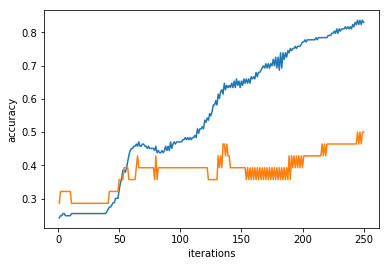

In [9]:
#build model
model = Sequential()

model.add(Embedding(len(embeddings_matrix),output_dim = 2,weights=[embeddings_matrix],mask_zero=True))
model.add(GRU(batch_input_shape=(None,10),units=36,dropout = 0.0,bias_initializer='zeros'))
model.add(Dense(units=6, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, np.array(y_train) ,batch_size=None, shuffle=True, verbose=1)
#categorical_crossentropy
#優化器:sgd adagrad rmsprop adadelta adam adamax nadam tfoptimizer


loss_array = []
accuracy_array = []
accuracy_test = []

for step in range(1, 251):
    loss = model.train_on_batch(np.array(X_train), y_train)
    loss, accuracy = model.evaluate(X_train, y_train, batch_size=y_test.shape[0], verbose=False)
    X = X_test
    predictions = model.predict_classes(X)
    loss_array.append(loss)
    accuracy_array.append(accuracy)
    if step%25==0:
        print("iteration:",step,"loss: {}  accuracy: {}".format(loss,accuracy))
    accuracy = 0
    for i in range(28):
        for j in range(6):
            if y_test[i][j] == 1:
                ans = j
                if ans == predictions[i]:
                    accuracy += 1
    if step%25==0:
        print("test accuracy:",accuracy/28)
    accuracy_test.append(accuracy/28)

#get prediction result 
X = X_test
predictions = model.predict_classes(X) 
accuracy = 0

plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.plot([x+1 for x in range(250)],accuracy_array)
plt.plot([x+1 for x in range(250)],accuracy_test)

